# Project 4 K-Nearest Neighbors On Two Data Sets

## Part 1: Cleveland Data Set

In [1]:
# TO RUN THIS NOTEBOOK:
# As per our README, please add a `datasets` folder containing `cleveland.csv`, `cleveland-test-sample.csv`, and `data.csv`
# The link for `data.csv` is given in Part 2 below.

import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score


from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import precision_recall_fscore_support

In [2]:
clevelandDf = pd.read_csv('datasets/cleveland.csv')# SO when we are in class testing our code, put the new file here and itll spit us an f1 score

clevelandDf.replace('?', np.nan, inplace=True)

clevelandDf['num'] = (clevelandDf['num'] > 0).astype(int)

clevelandDf.dropna(inplace=True)

selected_features = ['age', 'sex', 'cp','trestbps', 'chol' ]#
selected_features_with_target = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
XwithTarget = clevelandDf[selected_features_with_target]
X = clevelandDf[selected_features]

y = clevelandDf['num']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

best_k = 6  # test others
nn = NearestNeighbors(n_neighbors=best_k, metric='euclidean', algorithm='auto')
nn.fit(X_train)

distances, indices = nn.kneighbors(X_test)
predictions = [np.any(y_train.iloc[indices[i]] > 0) for i in range(len(X_test))]  # Considering any non-zero prediction as heart disease

precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print("K value:", best_k)
print("Selected attributes:", selected_features)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

K value: 6
Selected attributes: ['age', 'sex', 'cp', 'trestbps', 'chol']
Precision: 0.5106382978723404
Recall: 1.0
F1 score: 0.676056338028169


- As I messed around with different K values, I realized that as I went up, we got worse. This is because of overfitting. As we made the model more complex than it needs to be, we started getting more and more incorrect. But as our K decreased, our scores went up, leading us to go with a lower K.

In [3]:
new_data = pd.read_csv('datasets/cleveland-test-sample.csv')

new_data.replace('?', np.nan, inplace=True)
new_data.dropna(inplace=True)
X_new = new_data[selected_features]

X_new_scaled = scaler.transform(X_new)

nn = NearestNeighbors(n_neighbors=best_k, metric='euclidean', algorithm='auto')
nn.fit(X_scaled)
distances, indices = nn.kneighbors(X_new_scaled)
predictions = [np.any(y.iloc[indices[i]] > 0) for i in range(len(X_new_scaled))]  # Consider any non-zero prediction as heart disease

print("Predictions for new dataset:")
print(predictions)


Predictions for new dataset:
[False, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, False]


## How we selected an optimal k

[0.5, 0.6229508196721312, 0.6956521739130435, 0.6857142857142857, 0.676056338028169, 0.676056338028169, 0.6486486486486487, 0.64, 0.631578947368421, 0.6233766233766234, 0.6233766233766234, 0.6075949367088608, 0.6, 0.5925925925925926, 0.5925925925925926, 0.5853658536585366, 0.5853658536585366, 0.5853658536585366, 0.5853658536585366, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5783132530120482, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714, 0.5714285714285714]


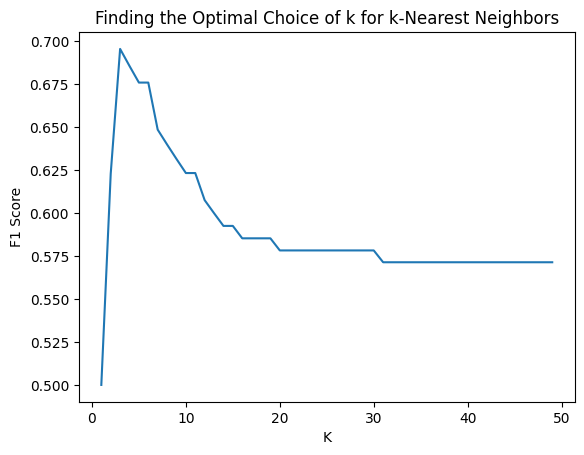

Best score: 0.6956521739130435 best k  3


In [4]:
def getF1(k):
    nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')
    nn.fit(X_train)

    distances, indices = nn.kneighbors(X_test)
    predictions = [np.any(y_train.iloc[indices[i]] > 0) for i in range(len(X_test))]  # Considering any non-zero prediction as heart disease

    f1 = f1_score(y_test, predictions)
    return f1

kvals = range(1, 50)
scores = [getF1(k) for k in kvals]
print(scores)
plt.plot(kvals, scores)
plt.xlabel('K') 
plt.ylabel('F1 Score')
plt.title('Finding the Optimal Choice of k for k-Nearest Neighbors')
plt.show()
best_score = max(scores)
print("Best score:", best_score, "best k ", kvals[scores.index(best_score)])

From this we see that there is a stark difference in performance as we get a higher k value. This is interesting for a few reasons
- With such a small K value, we get scared that we are being overfitted with the small dataset, however since we set a test data set, and we made sure to keep them seperate, that likely isn't the case
- This might be because it will have bad performance on new data, for example from another hospital.

In [5]:
from sklearn.model_selection import train_test_split

k = 6
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

CROSS_VALIDATIONS = 11

attributes_list = [
    ['age', 'sex'],
    ['age', 'cp'],
    ['age', 'trestbps'],
    ['age', 'chol'],
    ['age', 'fbs'],
    ['age', 'restecg'],
    ['age', 'thalach'],
    ['age', 'exang'],
    ['age', 'oldpeak'],
    ['age', 'slope'],
    ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],#testing all columns
]
X = XwithTarget
y = X[['num']].values

X_train_list = []
X_test_list = []
y_train_list = []
y_test_list = []

for attributes in attributes_list:
    X_subset = X[attributes].values
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.25)
    X_train_list.append(X_train)
    X_test_list.append(X_test)
    y_train_list.append(y_train)
    y_test_list.append(y_test)

for i in range(CROSS_VALIDATIONS):
    X_train = X_train_list[i]
    X_test = X_test_list[i]
    y_train = y_train_list[i]
    y_test = y_test_list[i]
    
    nn.fit(X_train)

    distances, indices = nn.kneighbors(X_test)

    y_pred = np.zeros_like(y_test)
    for j in range(len(X_test)):
        neighbor_labels = y_train[indices[j]]
        unique_labels, counts = np.unique(neighbor_labels, return_counts=True)
        majority_label = unique_labels[np.argmax(counts)]
        y_pred[j] = majority_label
    
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for iteration {i+1}: {accuracy}" , " Attributes: " , attributes_list[i])

Accuracy for iteration 1: 0.6133333333333333  Attributes:  ['age', 'sex']
Accuracy for iteration 2: 0.72  Attributes:  ['age', 'cp']
Accuracy for iteration 3: 0.5066666666666667  Attributes:  ['age', 'trestbps']
Accuracy for iteration 4: 0.5733333333333334  Attributes:  ['age', 'chol']
Accuracy for iteration 5: 0.5333333333333333  Attributes:  ['age', 'fbs']
Accuracy for iteration 6: 0.5333333333333333  Attributes:  ['age', 'restecg']
Accuracy for iteration 7: 0.64  Attributes:  ['age', 'thalach']
Accuracy for iteration 8: 0.56  Attributes:  ['age', 'exang']
Accuracy for iteration 9: 0.56  Attributes:  ['age', 'oldpeak']
Accuracy for iteration 10: 0.6  Attributes:  ['age', 'slope']
Accuracy for iteration 11: 0.6666666666666666  Attributes:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


## Part 2: Student Dropout Data Set

## [Student Dropout Dataset ("data.csv") here](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [6]:
school_df = pd.read_csv('datasets/data.csv', sep=';')
interested_columns = ["Age at enrollment", "Tuition fees up to date", "Previous qualification (grade)", "Scholarship holder", "Target"]
school_interested = school_df[interested_columns].copy()

# Undersampling the majority (non-dropouts):
# This block is essential to avoid bias; it ensures equal amounts of dropouts and non-dropouts in the dataset
dropout_count = school_interested['Target'].value_counts().get('Dropout')
not_dropout_count = (school_interested['Target'] != 'dropout').sum()
dropout_students = school_interested[school_interested['Target'] == 'Dropout']
not_dropout_students = school_interested[school_interested['Target'] != 'Dropout']
not_dropout_sampled = not_dropout_students.sample(n=dropout_count, random_state=42)
balanced_school_df = pd.concat([dropout_students, not_dropout_sampled])
school_interested = balanced_school_df.sample(frac=1, random_state=42)

school_interested['Age standardized'] = (school_interested['Age at enrollment'] - school_interested['Age at enrollment'].mean()) / (school_interested['Age at enrollment'].std())
school_interested['Tuition standardized'] = (school_interested['Tuition fees up to date'] - school_interested['Tuition fees up to date'].mean()) / (school_interested['Tuition fees up to date'].std())
school_interested['Grades standardized'] = (school_interested['Previous qualification (grade)'] - school_interested['Previous qualification (grade)'].mean()) / (school_interested['Previous qualification (grade)'].std())
school_interested['Scholarship standardized'] = (school_interested['Scholarship holder'] - school_interested['Scholarship holder'].mean()) / (school_interested['Scholarship holder'].std())

school_interested = school_interested.sort_values(by='Scholarship holder', ascending=False)

# Choosing 9 neighbors as the optimal k. Different values of k tested in the plot below
nn = NearestNeighbors(n_neighbors=9, metric='euclidean', algorithm='auto')

# Standarize each metric to reduce bias
age = 'Age standardized'
grade = 'Grades standardized'
tuition = 'Tuition standardized'
scholarship = 'Scholarship standardized'

student = school_interested.sample(1)
studentX = student[[age, grade, tuition, scholarship]].values[0]
display(student)

# Getting rid of the student of interest as a potential neighbor
X = school_interested.drop(student.index)[[age, grade, tuition, scholarship]].values

fit = nn.fit(X)
distances, indices = fit.kneighbors([studentX])
distances, indices

nbrs = school_interested.iloc[indices[0]]
display(nbrs)

in_school = nbrs[(nbrs['Target'] == "Enrolled") | (nbrs['Target'] == "Graduate")].count()
dropout = nbrs[nbrs['Target'] == "Dropout"].count()

prediction = "isn't a dropout" if in_school['Target'] > dropout['Target'] else "is a dropout"
print("We predict this student is: " + prediction)


,Age at enrollment,Tuition fees up to date,Previous qualification (grade),Scholarship holder,Target,Age standardized,Tuition standardized,Grades standardized,Scholarship standardized
2828,18,1,129.0,0,Enrolled,-0.759978,0.453539,-0.234265,-0.509569


,Age at enrollment,Tuition fees up to date,Previous qualification (grade),Scholarship holder,Target,Age standardized,Tuition standardized,Grades standardized,Scholarship standardized
1423,18,1,129.0,0,Graduate,-0.759978,0.453539,-0.234265,-0.509569
567,18,1,129.0,0,Dropout,-0.759978,0.453539,-0.234265,-0.509569
2215,19,1,133.0,0,Enrolled,-0.633973,0.453539,0.072702,-0.509569
3694,18,1,129.0,0,Dropout,-0.759978,0.453539,-0.234265,-0.509569
1553,18,1,130.0,0,Graduate,-0.759978,0.453539,-0.157523,-0.509569
1175,18,1,130.0,0,Dropout,-0.759978,0.453539,-0.157523,-0.509569
2478,18,1,128.0,0,Graduate,-0.759978,0.453539,-0.311007,-0.509569
501,18,1,128.0,0,Graduate,-0.759978,0.453539,-0.311007,-0.509569
2996,18,1,128.0,0,Graduate,-0.759978,0.453539,-0.311007,-0.509569


We predict this student is: isn't a dropout


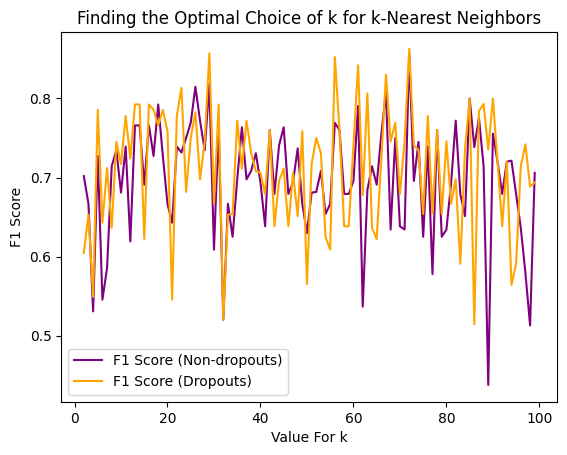

Average F1 score (Non-dropouts): 0.6961771834456469
Average F1 score (Dropouts): 0.711210638580389


In [7]:
# Testing different values of k
def get_scores(k):
    nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

    n = 50
    students = school_interested.sample(n)
    studentsX = students[[age, grade, tuition, scholarship]].values
    studentsY = students[['Target']].values

    studentsY = students[['Target']].values.flatten()
    studentsY = np.where(studentsY == 'Enrolled', 0, studentsY)
    studentsY = np.where(studentsY == 'Graduate', 0, studentsY)
    studentsY = np.where(studentsY == 'Dropout', 1, studentsY)
    studentsY = studentsY.reshape(-1, 1).astype(np.int64)

    distances, indices = fit.kneighbors(studentsX)

    y_pred = []
    for i in range(n):
        nbrs = school_interested.iloc[indices[i]]
        in_school = nbrs[(nbrs['Target'] == "Enrolled") | (nbrs['Target'] == "Graduate")].count()
        dropout = nbrs[nbrs['Target'] == "Dropout"].count()
        predict = 0 if (in_school['Target'] > dropout['Target']) else 1
        y_pred.append(predict)

    return precision_recall_fscore_support(studentsY, y_pred, labels=[0,1])

kvals = range(2, 100)
scores = [get_scores(k) for k in kvals]

precision_neg = [score[0][0] for score in scores]
recall_neg = [score[1][0] for score in scores]
f1_neg = [score[2][0] for score in scores]
f1_pos = [score[2][1] for score in scores]

plt.plot(kvals, f1_neg, color='purple', label='F1 Score (Non-dropouts)')
plt.plot(kvals, f1_pos, color='orange', label='F1 Score (Dropouts)')
plt.xlabel('Value For k')       # THE ERROR IS HERE
plt.ylabel('F1 Score')
plt.title('Finding the Optimal Choice of k for k-Nearest Neighbors')
plt.legend()
plt.show()

avg_f1_neg = np.mean(f1_neg)
avg_f1_pos = np.mean(f1_pos)

print("Average F1 score (Non-dropouts):", avg_f1_neg)
print("Average F1 score (Dropouts):", avg_f1_pos)

In [8]:
from sklearn.model_selection import train_test_split
# How we selected the attributes to use in our model.

k = 9
nn = NearestNeighbors(n_neighbors=k, metric='euclidean', algorithm='auto')

CROSS_VALIDATIONS = 11

attributes_list = [
    [age, grade],
    [age, tuition],
    [age, scholarship],
    [grade, tuition],
    [grade, scholarship],
    [tuition, scholarship],
    [grade, tuition, scholarship],
    [age, tuition, scholarship],
    [age, grade, scholarship],
    [age, grade, tuition],
    [age, grade, tuition, scholarship]
]

# Cross validations
X1 = school_interested[attributes_list[0]].values
X2 = school_interested[attributes_list[1]].values
X3 = school_interested[attributes_list[2]].values
X4 = school_interested[attributes_list[3]].values
X5 = school_interested[attributes_list[4]].values
X6 = school_interested[attributes_list[5]].values
X7 = school_interested[attributes_list[6]].values
X8 = school_interested[attributes_list[7]].values
X9 = school_interested[attributes_list[8]].values
X10 = school_interested[attributes_list[9]].values
X11 = school_interested[attributes_list[10]].values
y = school_interested[['Target']].values

X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y, test_size=0.25)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.25)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.25)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y, test_size=0.25)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y, test_size=0.25)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X6, y, test_size=0.25)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X7, y, test_size=0.25)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X8, y, test_size=0.25)
X_train9, X_test9, y_train9, y_test9 = train_test_split(X9, y, test_size=0.25)
X_train10, X_test10, y_train10, y_test10 = train_test_split(X10, y, test_size=0.25)
X_train11, X_test11, y_train11, y_test11 = train_test_split(X11, y, test_size=0.25)

for cross_val_num in range(CROSS_VALIDATIONS):
    n = 50
    students = school_interested.sample(n)
    studentsX = students[[age, grade, tuition, scholarship]].values
    studentsY = students[['Target']].values

    studentsY = students[['Target']].values.flatten()
    studentsY = np.where(studentsY == 'Enrolled', 0, studentsY)
    studentsY = np.where(studentsY == 'Graduate', 0, studentsY)
    studentsY = np.where(studentsY == 'Dropout', 1, studentsY)
    studentsY = studentsY.reshape(-1, 1).astype(np.int64)

    distances, indices = fit.kneighbors(studentsX)

    y_pred = []
    for i in range(n):
        nbrs = school_interested.iloc[indices[i]]
        in_school = nbrs[(nbrs['Target'] == "Enrolled") | (nbrs['Target'] == "Graduate")].count()
        dropout = nbrs[nbrs['Target'] == "Dropout"].count()
        predict = 0 if (in_school['Target'] > dropout['Target']) else 1
        y_pred.append(predict)

    (p,r,f,s) = precision_recall_fscore_support(studentsY, y_pred, labels=[0,1])
    print("ATTRIBUTES: " + str(attributes_list[cross_val_num]) + ",  k = " + str(k))
    print(f'Non-dropouts: precision={p[0]}, recall={r[0]}, f-score={f[0]}, support={s[0]}')
    print(f'Dropouts: precision={p[1]}, recall={r[1]}, f-score={f[1]}, support={s[1]}')

ATTRIBUTES: ['Age standardized', 'Grades standardized'],  k = 9
Non-dropouts: precision=0.7727272727272727, recall=0.5862068965517241, f-score=0.6666666666666666, support=29
Dropouts: precision=0.5714285714285714, recall=0.7619047619047619, f-score=0.6530612244897959, support=21
ATTRIBUTES: ['Age standardized', 'Tuition standardized'],  k = 9
Non-dropouts: precision=0.7916666666666666, recall=0.6551724137931034, f-score=0.7169811320754716, support=29
Dropouts: precision=0.6153846153846154, recall=0.7619047619047619, f-score=0.6808510638297872, support=21
ATTRIBUTES: ['Age standardized', 'Scholarship standardized'],  k = 9
Non-dropouts: precision=0.7727272727272727, recall=0.7083333333333334, f-score=0.7391304347826086, support=24
Dropouts: precision=0.75, recall=0.8076923076923077, f-score=0.7777777777777778, support=26
ATTRIBUTES: ['Grades standardized', 'Tuition standardized'],  k = 9
Non-dropouts: precision=0.7391304347826086, recall=0.6538461538461539, f-score=0.6938775510204082, s